In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import phenograph
from matplotlib import pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

Load in our processed, scaled data for cluster assignment and visualization

In [2]:
input_dir = 'inputs'
output_dir = 'outputs'

In [3]:
zscore_variable = pd.read_csv(os.path.join(input_dir, "zscore_variable_genes.csv"), index_col=0)
print(zscore_variable.shape)
zscore_variable.head()

(577, 1660)


,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
ENSMUSG00000025903,0.755368,-0.337802,-0.337802,0.055363,-0.337802,-0.337802,-0.337802,-0.337802,-0.083969,-0.337802,...,-0.337802,-0.337802,0.179139,-0.337802,-0.337802,-0.337802,1.118815,-0.337802,-0.337802,2.808559
ENSMUSG00000026126,-0.332991,-0.332991,-0.332991,0.838708,-0.332991,-0.332991,-0.332991,-0.332991,-0.080836,-0.332991,...,-0.332991,-0.332991,-0.332991,-0.332991,-0.332991,-0.332991,-0.332991,-0.332991,4.692455,-0.332991
ENSMUSG00000037503,1.172534,-0.314943,-0.314943,-0.314943,0.347354,1.291592,0.458935,-0.314943,-0.314943,1.387641,...,-0.314943,-0.314943,-0.314943,-0.314943,-0.314943,-0.314943,-0.314943,-0.314943,-0.314943,-0.314943
ENSMUSG00000010453,-0.303060,-0.303060,-0.303060,-0.303060,-0.303060,-0.303060,1.366492,-0.303060,0.069510,-0.303060,...,-0.303060,-0.303060,-0.303060,-0.303060,5.681360,-0.303060,-0.303060,0.239717,-0.303060,-0.303060
ENSMUSG00000048234,-0.344640,-0.344640,-0.344640,-0.344640,0.233700,-0.344640,-0.344640,-0.344640,-0.043034,-0.344640,...,0.170096,-0.344640,-0.344640,-0.344640,-0.344640,-0.344640,1.386125,0.094754,-0.344640,-0.344640


# PCA

We have lots of variables (610 genes over 1385 cells!!). Okay that's not a ton in the world of single cell, but we are still going to practice as if we had a much larger dataset. Before clustering, we can use PCA to reduce the data into fewer dimensions that capture all (the majority) of the variation in the dataset. This will help increase the speed of downstream clustering and visualization without losing any information.

In [4]:
#Initiate a PCA object to be calculated with 200 components. 
pca = PCA(n_components=200)

#Fit our data with this PCA and save the result. PCA requires the samples (cells) to be the rows of the dataframe and 
#the measurements (genes) to be the columns. So we are going to transpose our dataframe with .T
pca_result = pca.fit_transform(zscore_variable.T)

In [5]:
#The explained variance ratio will tell you how much of the variation in the dataset was captured by each component. 
#Notice there are 200 values in this array, that is because we kept 200 components.

pca.explained_variance_ratio_

array([0.06633732, 0.02933355, 0.02659024, 0.02132812, 0.0165857 ,
       0.0135171 , 0.01288324, 0.01097606, 0.00972683, 0.00766496,
       0.00725021, 0.00639733, 0.00620079, 0.00604614, 0.00568265,
       0.0056618 , 0.005543  , 0.00552313, 0.00544464, 0.00526286,
       0.0051849 , 0.00510445, 0.00507026, 0.00499051, 0.00489432,
       0.00486663, 0.0047915 , 0.00471814, 0.0046893 , 0.00466013,
       0.00464529, 0.00459815, 0.00456095, 0.00447172, 0.00445275,
       0.00440275, 0.00438094, 0.0043406 , 0.00423857, 0.00421199,
       0.00417672, 0.00415373, 0.00410514, 0.00408157, 0.00405973,
       0.00399993, 0.00396513, 0.00396202, 0.00393353, 0.00385837,
       0.00382984, 0.00382777, 0.00377352, 0.0037335 , 0.00369713,
       0.00367885, 0.00366264, 0.00362175, 0.00361006, 0.00355956,
       0.00355078, 0.00351707, 0.00350854, 0.00349188, 0.00345318,
       0.00344756, 0.00341122, 0.00339696, 0.00334875, 0.00333025,
       0.00332043, 0.00329486, 0.00328335, 0.00325419, 0.00325

In [6]:
#Lets look at the cumulative sum to see how many components we need to reach 100% (ish) of the variation captured

np.cumsum(pca.explained_variance_ratio_)

array([0.06633732, 0.09567087, 0.12226111, 0.14358923, 0.16017493,
       0.17369203, 0.18657527, 0.19755133, 0.20727815, 0.21494311,
       0.22219332, 0.22859065, 0.23479144, 0.24083758, 0.24652023,
       0.25218203, 0.25772503, 0.26324816, 0.2686928 , 0.27395566,
       0.27914056, 0.28424501, 0.28931527, 0.29430578, 0.29920011,
       0.30406674, 0.30885824, 0.31357638, 0.31826568, 0.32292582,
       0.3275711 , 0.33216925, 0.3367302 , 0.34120192, 0.34565467,
       0.35005742, 0.35443836, 0.35877896, 0.36301754, 0.36722952,
       0.37140624, 0.37555997, 0.37966511, 0.38374668, 0.38780641,
       0.39180635, 0.39577148, 0.3997335 , 0.40366703, 0.4075254 ,
       0.41135524, 0.41518301, 0.41895653, 0.42269003, 0.42638716,
       0.43006601, 0.43372866, 0.43735041, 0.44096047, 0.44452003,
       0.44807081, 0.45158788, 0.45509643, 0.45858831, 0.46204149,
       0.46548905, 0.46890027, 0.47229723, 0.47564598, 0.47897622,
       0.48229666, 0.48559152, 0.48887486, 0.49212905, 0.49537

Text(0,0.5,'cumulative explained variance')

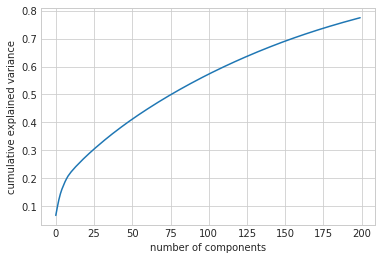

In [7]:
sns.set_style("whitegrid")

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

The plot above shows us that 80% of the variance is explained by the top 200 components, so lets keep all of them now for downstream analyses. Our variable pca_result contains the reduced value for each component calculated. We are going to put this into a pandas dataframe where each row is the cell ID (cellID information is stored in zscore_variable.columns

In [8]:
pca_df = pd.DataFrame(pca_result)
pca_df.index = zscore_variable.columns
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
AAACATTGTTTGGG-1,1.111598,-0.611059,1.900943,-2.496837,-4.774221,4.047545,-3.966158,0.138558,-0.017384,-0.393777,...,-0.659571,0.381595,0.522649,0.646236,-0.844758,-0.458307,0.046870,-0.449993,0.885112,-0.430879
AAACCGTGCCAAGT-1,-3.152160,-0.914021,0.796639,0.496650,2.771118,-0.898587,-0.934048,-1.402163,2.658084,-0.614252,...,-0.109929,0.772799,-1.327486,2.036624,1.104176,-1.336785,0.514803,-1.426116,-1.150226,0.892504
AAACGCACAGCCTA-1,-3.589850,6.517945,8.510871,6.178077,-0.266637,-3.785961,1.248006,1.027383,0.409032,-2.471054,...,0.529118,-0.422526,-0.191702,0.880693,0.697109,-0.988927,0.922697,-1.141772,-0.886706,0.016681
AAACGCACCAGATC-1,-1.231824,-0.948492,0.502779,0.112367,0.592037,0.067962,-1.951511,-0.178765,-1.142376,0.673920,...,0.289188,-0.574119,-0.281592,-0.027812,-0.243092,-0.168980,0.030042,0.077029,-0.304511,-0.409282
AAACGCACCGCCTT-1,-3.089266,-0.496092,1.340016,-1.626505,0.492393,0.591753,1.467622,1.778900,0.489178,-1.275770,...,-0.200224,0.271771,0.597020,0.229503,-0.296054,0.515112,-0.588771,0.810049,0.281754,0.247974


# PhenoGraph

[PhenoGraph](https://www.c2b2.columbia.edu/danapeerlab/html/phenograph.html) is the graph-based clustering algorithm we will use to assign cells to clusters. We are going to use the dimensionality reduced-data for clustering. 

In [9]:
#phenograph.cluster will return 3 things (so we are assigning the result to 3 variables)
communities_30, sparse_matrix30, Q30 = phenograph.cluster(pca_df, k=30)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.21618247032165527 seconds
Jaccard graph constructed in 0.3712320327758789 seconds
Wrote graph to binary file in 0.14875364303588867 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.69504
Louvain completed 21 runs in 0.7422409057617188 seconds
PhenoGraph complete in 1.4973642826080322 seconds


In [10]:
#Let's take a look at how many communities (clusters) were assigned and the number of cells in each cluster

cluster, freq = np.unique(communities_30, return_counts = True)
print(np.asarray((cluster, freq)).T)

[[  0 504]
 [  1 492]
 [  2 170]
 [  3 121]
 [  4  98]
 [  5  95]
 [  6  92]
 [  7  51]
 [  8  37]]


# t-SNE

Here are some good resources explaining the use of t-SNE: [official website](https://lvdmaaten.github.io/tsne/), [blogpost](https://distill.pub/2016/misread-tsne/), [pca and tsne code in python](https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b). tSNE is meant for visualization of high-dimensional data in 2D. We are going to color the cells based on the cluster assignments from phenograph for visualization. As a comparison, we will also color the cells based on the cluster assignments from the paper and see how our results compare. 

In [11]:
#First, run tSNE on the same data that is used for clustering (the reduced data that we generated earlier with PCA)

tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=5000, random_state=919)
tsne_pca = tsne.fit_transform(pca_df)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 1660 samples in 0.008s...
[t-SNE] Computed neighbors for 1660 samples in 1.236s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1660
[t-SNE] Computed conditional probabilities for sample 1660 / 1660
[t-SNE] Mean sigma: 2.971092
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.359787
[t-SNE] Error after 1850 iterations: 1.497486


In [12]:
tsne_pca

array([[-10.386154 ,  11.758343 ],
       [  5.8001113, -13.783989 ],
       [ 14.682107 , -15.672992 ],
       ...,
       [ -3.76642  ,   2.6445396],
       [  4.4204445,   4.2949324],
       [ -7.9134474,  10.718688 ]], dtype=float32)

# Cluster annotation

#### read in markers

#### Convert gene names to gene ids for each subgroup
- inner join

#### append cluster assignment to matrix

In [21]:
#This code will make a dataframe with our results from tsne to use in plotting. 
#We are going to assign the pheongraph community to each cell as well as the cell type identified from the paper

df_tsne_pca = pd.DataFrame(tsne_pca, index = pca_df.index)
df_tsne_pca.rename(columns = {0:'x',1:'y'}, inplace=True)
df_tsne_pca['community'] = communities_30

cell_types_paper = []
# for i in df_tsne_pca.iterrows():
#    print(i.loc['community',:])
#    cell_type = i[0].split("_")[2]
#    cell_types_paper.append(cell_type)

#df_tsne_pca['paper_assignment'] = cell_types_paper
#df_tsne_pca.head()

# df_tsne_pca.index = df_tsne_pca.index + "_" + df_tsne_pca['community'].astype('str')
df_tsne_pca.head()

,x,y,community
AAACATTGTTTGGG-1,-10.386154,11.758343,6
AAACCGTGCCAAGT-1,5.800111,-13.783989,5
AAACGCACAGCCTA-1,14.682107,-15.672992,3
AAACGCACCAGATC-1,-2.855672,2.788013,1
AAACGCACCGCCTT-1,11.309718,-7.392127,0


The x, y components calculated with tSNE provide the 2-dimensional coordinates for plotting. We are going to assign the color on this plot based on the community assignment (set the hue variable to community). 

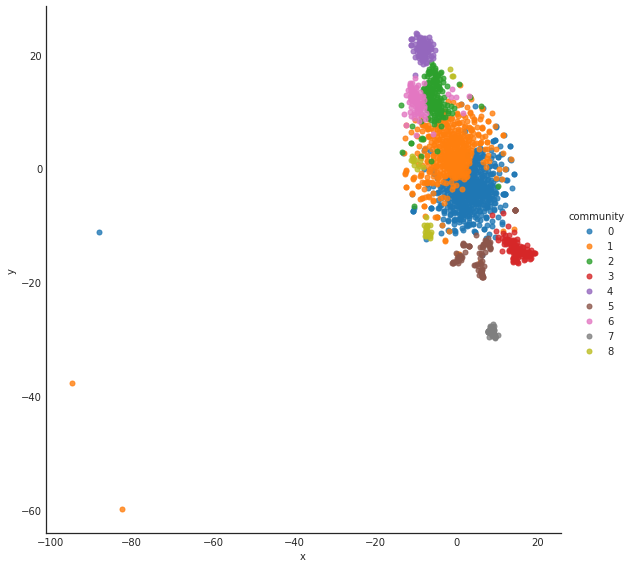

In [22]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='community', fit_reg=False, 
              scatter_kws={"s":25}, size=8)

How do our results compare to what the authors found in the paper? Why might they be different?

In [15]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='paper_assignment', fit_reg=False, 
              scatter_kws={"s":25}, size=8)

KeyError: "['paper_assignment'] not in index"

Save the cluster assignments to a file that we will use later for differential gene expression.

In [23]:
df_tsne_pca.to_csv(os.path.join(output_dir, "tsne_phenograph_k30_results.csv"))

In [24]:
df_tsne_pca['community'].to_csv(os.path.join(output_dir, "cells_phenograph_k30_assignment.csv"))